<a href="https://colab.research.google.com/github/Kavya-1708/Bio_signal_analysis/blob/main/bio_signal_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# import the libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [30]:
# Loading the dataset
df = pd.read_csv("/content/smoking.csv", on_bad_lines="warn")
df = df.drop(columns=["ID","oral"], errors ="ignore")
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [31]:
# shape of the dataset
df.shape

(55692, 25)

In [32]:
# info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55692 entries, 0 to 55691
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               55692 non-null  object 
 1   age                  55692 non-null  int64  
 2   height(cm)           55692 non-null  int64  
 3   weight(kg)           55692 non-null  int64  
 4   waist(cm)            55692 non-null  float64
 5   eyesight(left)       55692 non-null  float64
 6   eyesight(right)      55692 non-null  float64
 7   hearing(left)        55692 non-null  float64
 8   hearing(right)       55692 non-null  float64
 9   systolic             55692 non-null  float64
 10  relaxation           55692 non-null  float64
 11  fasting blood sugar  55692 non-null  float64
 12  Cholesterol          55692 non-null  float64
 13  triglyceride         55692 non-null  float64
 14  HDL                  55692 non-null  float64
 15  LDL                  55692 non-null 

In [33]:
# Describe the dataset
df.describe()

,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
count,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,...,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000,55692.000000
mean,44.182917,164.649321,65.864936,82.046418,1.012623,1.007443,1.025587,1.026144,121.494218,76.004830,...,57.290347,114.964501,14.622592,1.087212,0.885738,26.182935,27.036037,39.952201,0.213334,0.367288
std,12.071418,9.194597,12.820306,9.274223,0.486873,0.485964,0.157902,0.159564,13.675989,9.679278,...,14.738963,40.926476,1.564498,0.404882,0.221524,19.355460,30.947853,50.290539,0.409665,0.482070
min,20.000000,130.000000,30.000000,51.000000,0.100000,0.100000,1.000000,1.000000,71.000000,40.000000,...,4.000000,1.000000,4.900000,1.000000,0.100000,6.000000,1.000000,1.000000,0.000000,0.000000
25%,40.000000,160.000000,55.000000,76.000000,0.800000,0.800000,1.000000,1.000000,112.000000,70.000000,...,47.000000,92.000000,13.600000,1.000000,0.800000,19.000000,15.000000,17.000000,0.000000,0.000000
50%,40.000000,165.000000,65.000000,82.000000,1.000000,1.000000,1.000000,1.000000,120.000000,76.000000,...,55.000000,113.000000,14.800000,1.000000,0.900000,23.000000,21.000000,25.000000,0.000000,0.000000
75%,55.000000,170.000000,75.000000,88.000000,1.200000,1.200000,1.000000,1.000000,130.000000,82.000000,...,66.000000,136.000000,15.800000,1.000000,1.000000,28.000000,31.000000,43.000000,0.000000,1.000000
max,85.000000,190.000000,135.000000,129.000000,9.900000,9.900000,2.000000,2.000000,240.000000,146.000000,...,618.000000,1860.000000,21.100000,6.000000,11.600000,1311.000000,2914.000000,999.000000,1.000000,1.000000


In [34]:
# Check if there are any missing values
df.isnull().sum()

,0
gender,0
age,0
height(cm),0
weight(kg),0
waist(cm),0
eyesight(left),0
eyesight(right),0
hearing(left),0
hearing(right),0
systolic,0


In [35]:
# remove the rows that is missing
df_cleaned = df.dropna()

In [36]:
# Display top rows
df.head()

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
0,F,40,155,60,81.3,1.2,1.0,1.0,1.0,114.0,...,126.0,12.9,1.0,0.7,18.0,19.0,27.0,0,Y,0
1,F,40,160,60,81.0,0.8,0.6,1.0,1.0,119.0,...,127.0,12.7,1.0,0.6,22.0,19.0,18.0,0,Y,0
2,M,55,170,60,80.0,0.8,0.8,1.0,1.0,138.0,...,151.0,15.8,1.0,1.0,21.0,16.0,22.0,0,N,1
3,M,40,165,70,88.0,1.5,1.5,1.0,1.0,100.0,...,226.0,14.7,1.0,1.0,19.0,26.0,18.0,0,Y,0
4,F,40,155,60,86.0,1.0,1.0,1.0,1.0,120.0,...,107.0,12.5,1.0,0.6,16.0,14.0,22.0,0,N,0


In [37]:
# bottom rows
df.tail(10)

,gender,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,tartar,smoking
55682,M,20,175,75,85.0,0.9,1.5,1.0,1.0,118.0,...,80.0,16.6,1.0,1.2,13.0,6.0,14.0,0,Y,0
55683,M,40,180,85,86.5,1.2,1.2,1.0,1.0,116.0,...,183.0,16.3,1.0,1.3,21.0,19.0,38.0,0,N,0
55684,M,40,170,65,85.0,1.2,1.2,1.0,1.0,106.0,...,116.0,15.6,1.0,1.1,22.0,25.0,33.0,0,Y,1
55685,M,40,170,80,90.5,1.2,1.5,1.0,1.0,130.0,...,135.0,14.8,1.0,0.9,16.0,28.0,68.0,0,Y,0
55686,F,60,150,50,75.0,1.0,1.2,1.0,1.0,102.0,...,116.0,12.6,1.0,0.8,26.0,21.0,14.0,0,Y,0
55687,F,40,170,65,75.0,0.9,0.9,1.0,1.0,110.0,...,118.0,12.3,1.0,0.6,14.0,7.0,10.0,1,Y,0
55688,F,45,160,50,70.0,1.2,1.2,1.0,1.0,101.0,...,79.0,14.0,1.0,0.9,20.0,12.0,14.0,0,Y,0
55689,F,55,160,50,68.5,1.0,1.2,1.0,1.0,117.0,...,63.0,12.4,1.0,0.5,17.0,11.0,12.0,0,N,0
55690,M,60,165,60,78.0,0.8,1.0,1.0,1.0,133.0,...,146.0,14.4,1.0,0.7,20.0,19.0,18.0,0,N,0
55691,M,55,160,65,85.0,0.9,0.7,1.0,1.0,124.0,...,150.0,15.0,1.0,0.8,26.0,29.0,41.0,0,Y,1


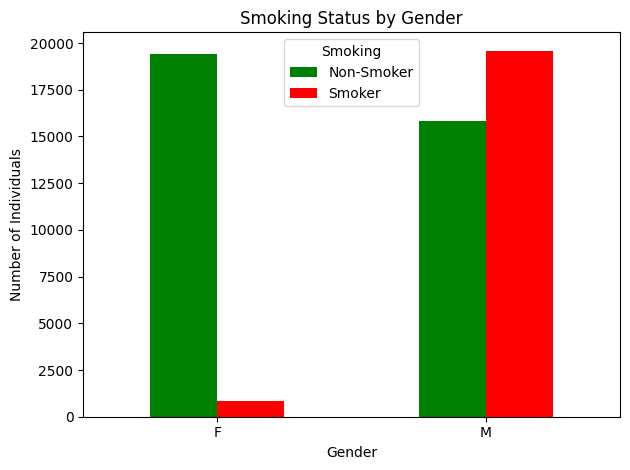

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset, handling errors
df = pd.read_csv("/content/smoking.csv", on_bad_lines='skip', engine="python") # Use 'skip' to skip bad lines or 'error' to raise an error

# Group data by gender and smoking status, then count the entries
gender_smoking_counts = df.groupby(['gender', 'smoking']).size().unstack()

# Plot a grouped bar chart
gender_smoking_counts.plot(kind='bar', color=['green', 'red'])

# Customize the plot
plt.title('Smoking Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Individuals')
plt.legend(['Non-Smoker', 'Smoker'], title='Smoking')
plt.xticks(rotation=0)
plt.tight_layout()

# Show the plot
plt.show()


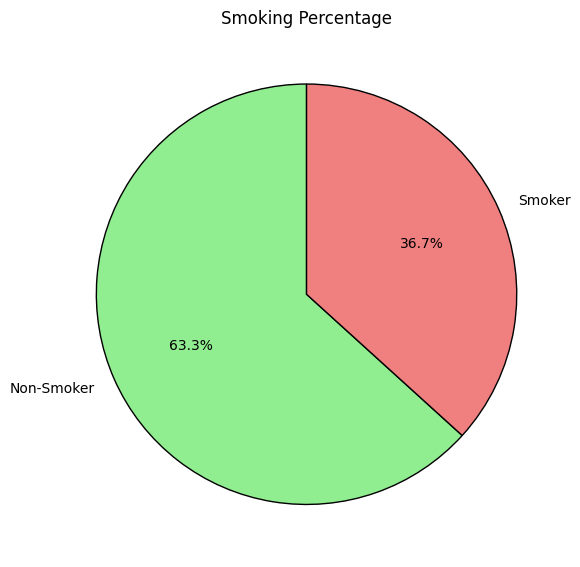

In [39]:
# Count smokers and non-smokers
smoking_counts = df['smoking'].value_counts().sort_index()

# Labels and colors
labels = ['Non-Smoker', 'Smoker']
colors = ['lightgreen', 'lightcoral']

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(smoking_counts, labels=labels, autopct='%1.1f%%', startangle=90,
        colors=colors, wedgeprops={'edgecolor': 'black'})
plt.title('Smoking Percentage')
plt.tight_layout()
plt.show()


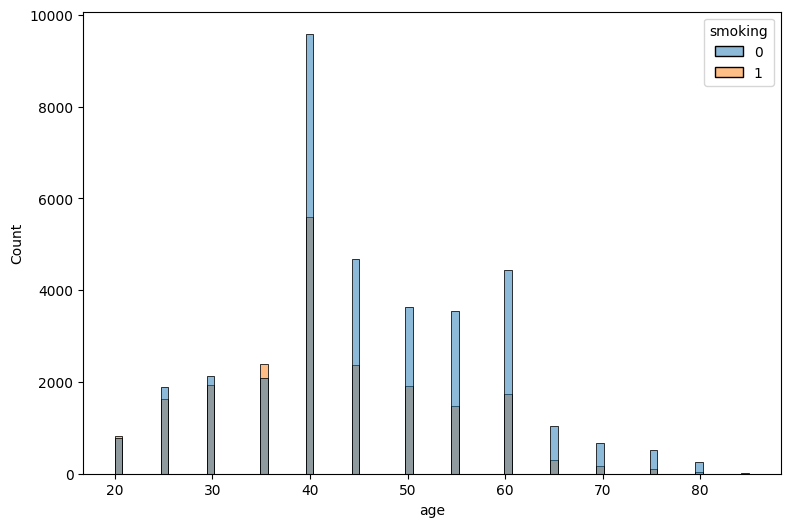

In [40]:
# age group that smokes the most
plt.figure(figsize=(9,6))
sns.histplot(x=df["age"],hue=df["smoking"])
plt.show()

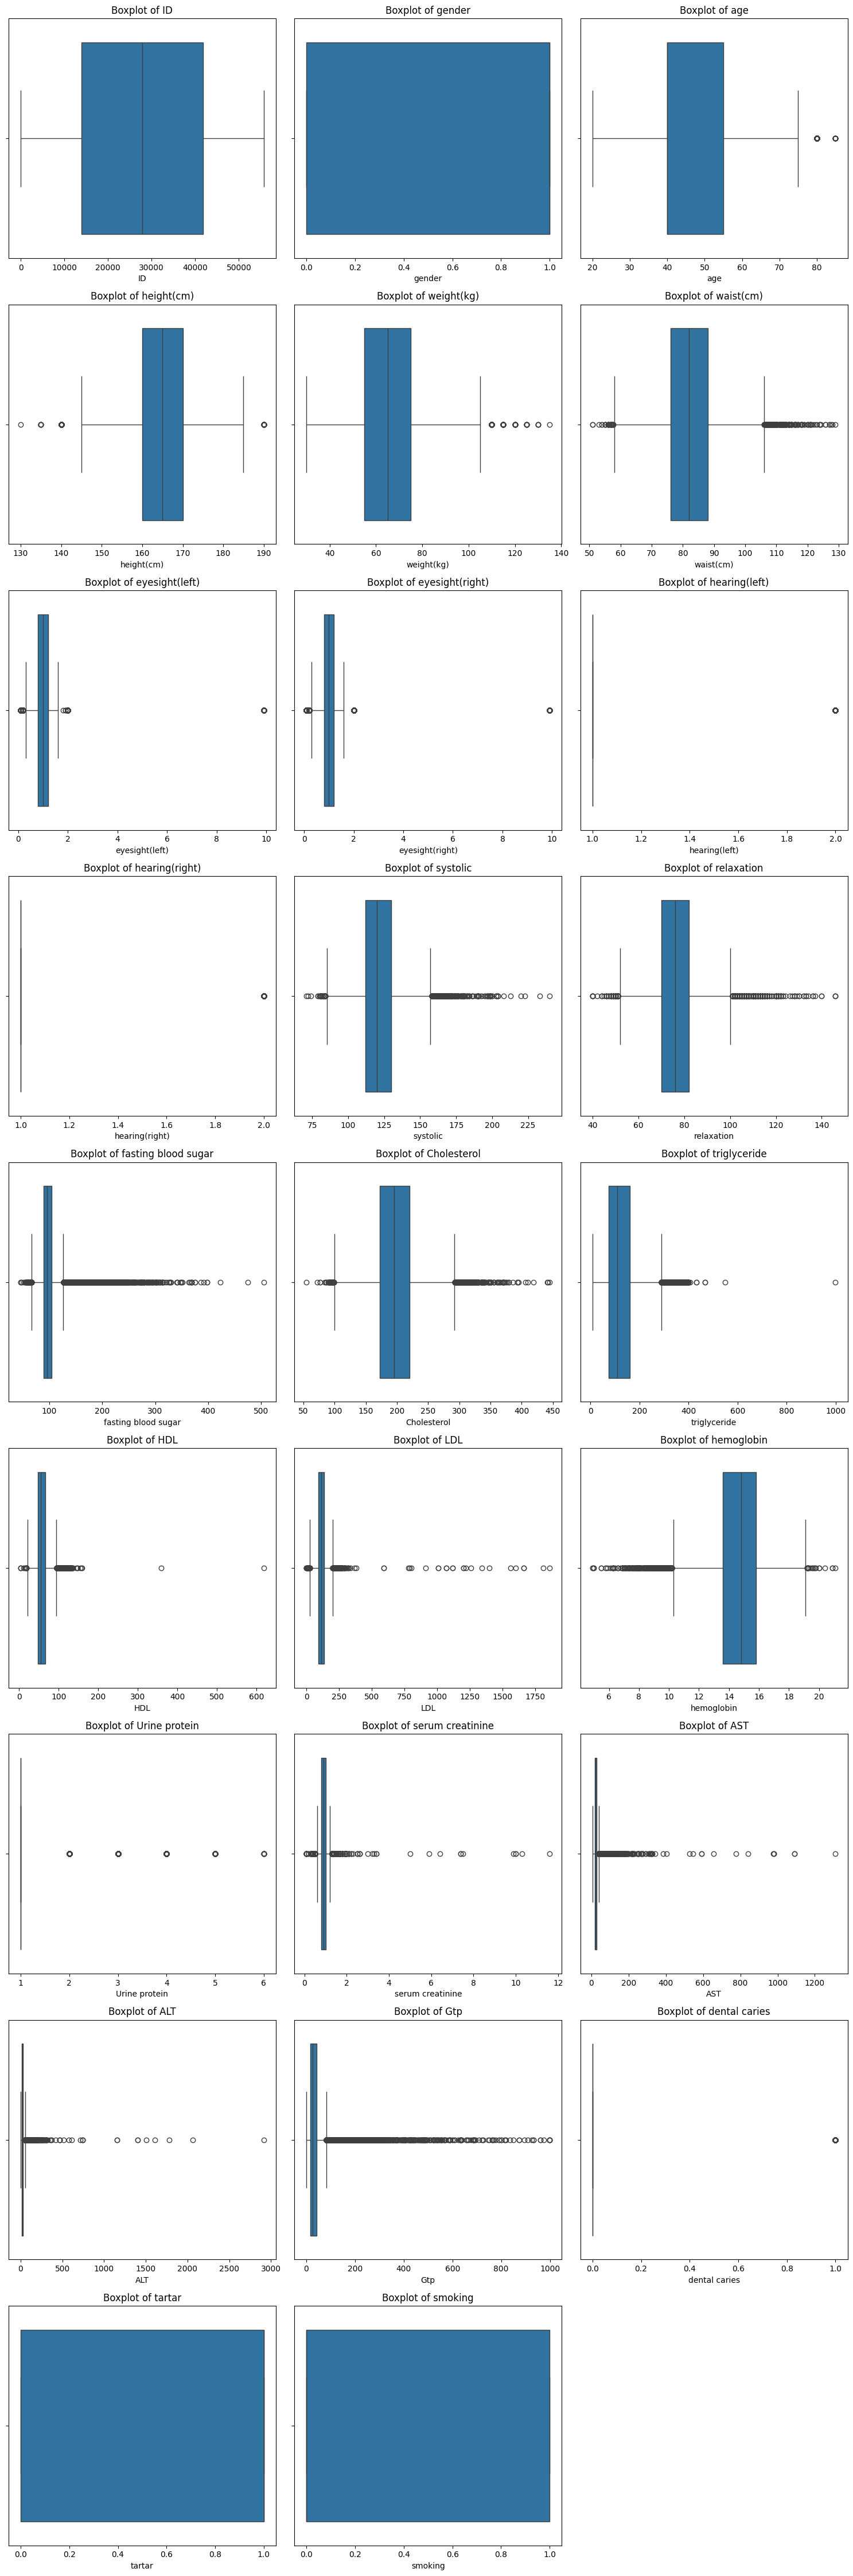

In [46]:
# Get only numerical columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Set up subplots
n_cols = 3  # Number of plots per row
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

for idx, col in enumerate(numeric_cols):
    sns.boxplot(x=df[col], ax=axes[idx])
    axes[idx].set_title(f'Boxplot of {col}')

# Remove empty subplots
for i in range(len(numeric_cols), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()


In [47]:
# Encoding

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['tartar'] = le.fit_transform(df['tartar'])
df['smoking'] = le.fit_transform(df['smoking'])

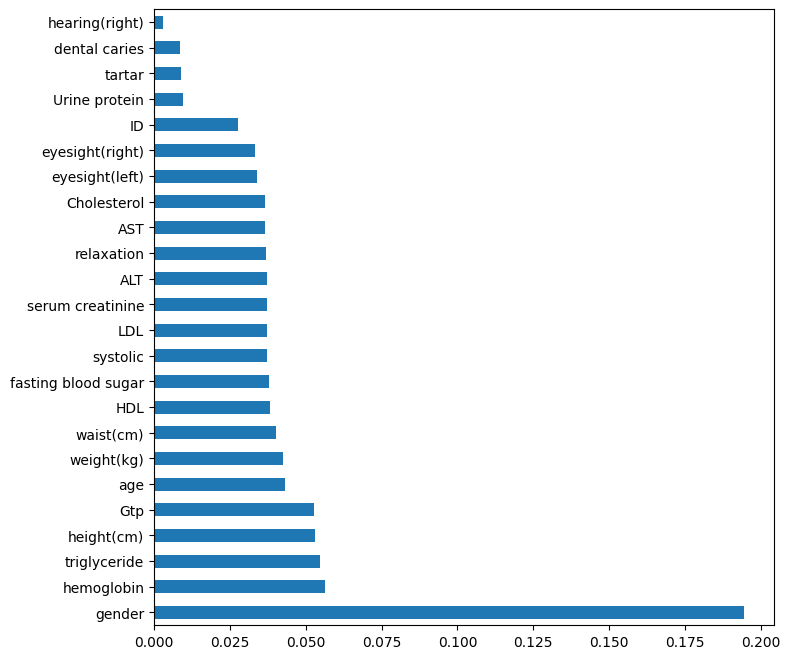

In [48]:
# Feature Selection and Encoding

x = df.iloc[:,:-1]
y = df["smoking"]

# Identify categorical features for encoding
categorical_features = x.select_dtypes(include=['object']).columns

# One-Hot Encoding for categorical features
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for dense output
encoded_data = encoder.fit_transform(x[categorical_features])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Drop original categorical columns and concatenate encoded features
x = x.drop(columns=categorical_features)
x = pd.concat([x, encoded_df], axis=1)

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(x,y)
df1 = pd.Series(model.feature_importances_, index=x.columns)
plt.figure(figsize=(8,8))
df1.nlargest(24).plot(kind="barh")
plt.show()

In [49]:
# Logistic Regression
x = df[["gender","height(cm)","Gtp","hemoglobin","triglyceride","age","weight(kg)","waist(cm)","HDL","serum creatinine","ALT",
"fasting blood sugar","relaxation","LDL","systolic"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))


0.7351647365113565
              precision    recall  f1-score   support

           0       0.81      0.76      0.78      7027
           1       0.63      0.69      0.66      4112

    accuracy                           0.74     11139
   macro avg       0.72      0.73      0.72     11139
weighted avg       0.74      0.74      0.74     11139



In [50]:
# Decision Trees
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred = dt.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.778166801328665
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      7027
           1       0.70      0.70      0.70      4112

    accuracy                           0.78     11139
   macro avg       0.76      0.76      0.76     11139
weighted avg       0.78      0.78      0.78     11139



In [ ]:
# Bagging Algorithm
from sklearn.ensemble import BaggingClassifier
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(),n_estimators=1000)
bagging_clf.fit(x_train,y_train).score(x_test,y_test)
y_pred = bagging_clf.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))